In [6]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense,LSTM,Conv1D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [2]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


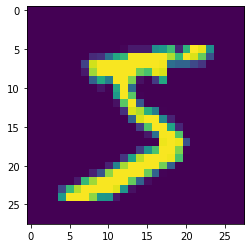

In [3]:

plt.imshow(x_train[0])

In [8]:
k=len(set(y_train))
inputs=Input(shape=(28,28))
lstm= LSTM(64, return_sequences=True, return_state=True,input_shape=(None,28))(inputs)
d1=Dense(16,activation="relu")(lstm[1])


"""last hidden layer i.e.. output layer"""
d2=Dense(10,activation='sigmoid')(d1)
model=Model(inputs,d2)
 
'''model description'''
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm_3 (LSTM)               [(None, 28, 64),          23808     
                              (None, 64),                        
                              (None, 64)]                        
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 25,018
Trainable params: 25,018
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1,epsilon=1),loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [10]:
model.fit(x_train,y_train,epochs=20,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

Epoch 1/20
1688/1688 [==============================] - 30s 17ms/step - loss: 1.0535 - sparse_categorical_accuracy: 0.6436 - val_loss: 0.5846 - val_sparse_categorical_accuracy: 0.8002
Epoch 2/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.5655 - sparse_categorical_accuracy: 0.8087 - val_loss: 0.4652 - val_sparse_categorical_accuracy: 0.8415
Epoch 3/20
1688/1688 [==============================] - 28s 16ms/step - loss: 0.4874 - sparse_categorical_accuracy: 0.8344 - val_loss: 0.4073 - val_sparse_categorical_accuracy: 0.8575
Epoch 4/20
1688/1688 [==============================] - 28s 16ms/step - loss: 0.4283 - sparse_categorical_accuracy: 0.8545 - val_loss: 0.3679 - val_sparse_categorical_accuracy: 0.8763
Epoch 5/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8672 - val_loss: 0.3308 - val_sparse_categorical_accuracy: 0.8870
Epoch 6/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.